In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
%reload_ext autoreload
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import datetime
from setdir import *
from plotglider import *
from scipy.io import loadmat # to load bathymetry
import xarray as xr
#import seaborn as sns
import glob
from scipy import stats
import cmocean
import gsw
from calc_oxy import *

In [6]:
tmp = cat_proc_path('unit_398_data_20220216.nc')


In [4]:
print(tmp)

../01-data/03-processed/test_save.nc


In [7]:
xr1 = xr.open_dataset(tmp)

In [14]:
uname = 'unit_398'
sensor_sn = {
    'unit_398': {"optode S/N": "232"},
    'unit_409': {"optode S/N": "268"},
}
sensorsn1 = sensor_sn[uname]
data_ds = xr1.assign_attrs(sensorsn1)
data_ds = calc_o2conc_cal(data_ds)
print(data_ds)



<xarray.Dataset>
Dimensions:                        (time: 77344)
Coordinates:
  * time                           (time) datetime64[ns] 2021-12-12 ... 2022-...
Data variables: (12/27)
    sci_water_temp                 (time) float64 nan nan nan ... nan nan nan
    sci_water_cond                 (time) float64 nan nan nan ... nan nan nan
    derived_salinity               (time) float64 nan nan nan ... nan nan nan
    derived_potential_density      (time) float64 nan nan nan ... nan nan nan
    derived_potential_temperature  (time) float64 nan nan nan ... nan nan nan
    sci_bb2flsv9_b532_scaled       (time) float64 nan nan nan ... nan nan nan
    ...                             ...
    m_gps_lat                      (time) float64 nan nan nan ... nan 56.05 nan
    m_lat                          (time) float64 60.35 60.35 ... nan 56.05
    m_lon                          (time) float64 -46.79 -46.79 ... nan -53.05
    pressure_dbar                  (time) float64 nan nan nan ... nan nan

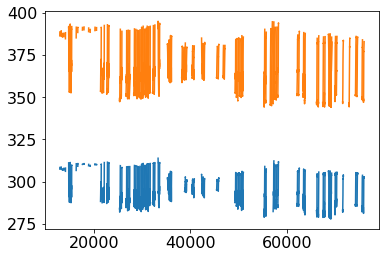

In [16]:
plt.plot(data_ds.o2conc_cal)
plt.plot(data_ds.sci_oxy4_oxygen)